In [5]:
# import needed libriries alongside with removing some warning so they don't show up
import sys
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [6]:
matrix = pd.read_csv('small_data_set.csv')

LinAlgError: singular matrix

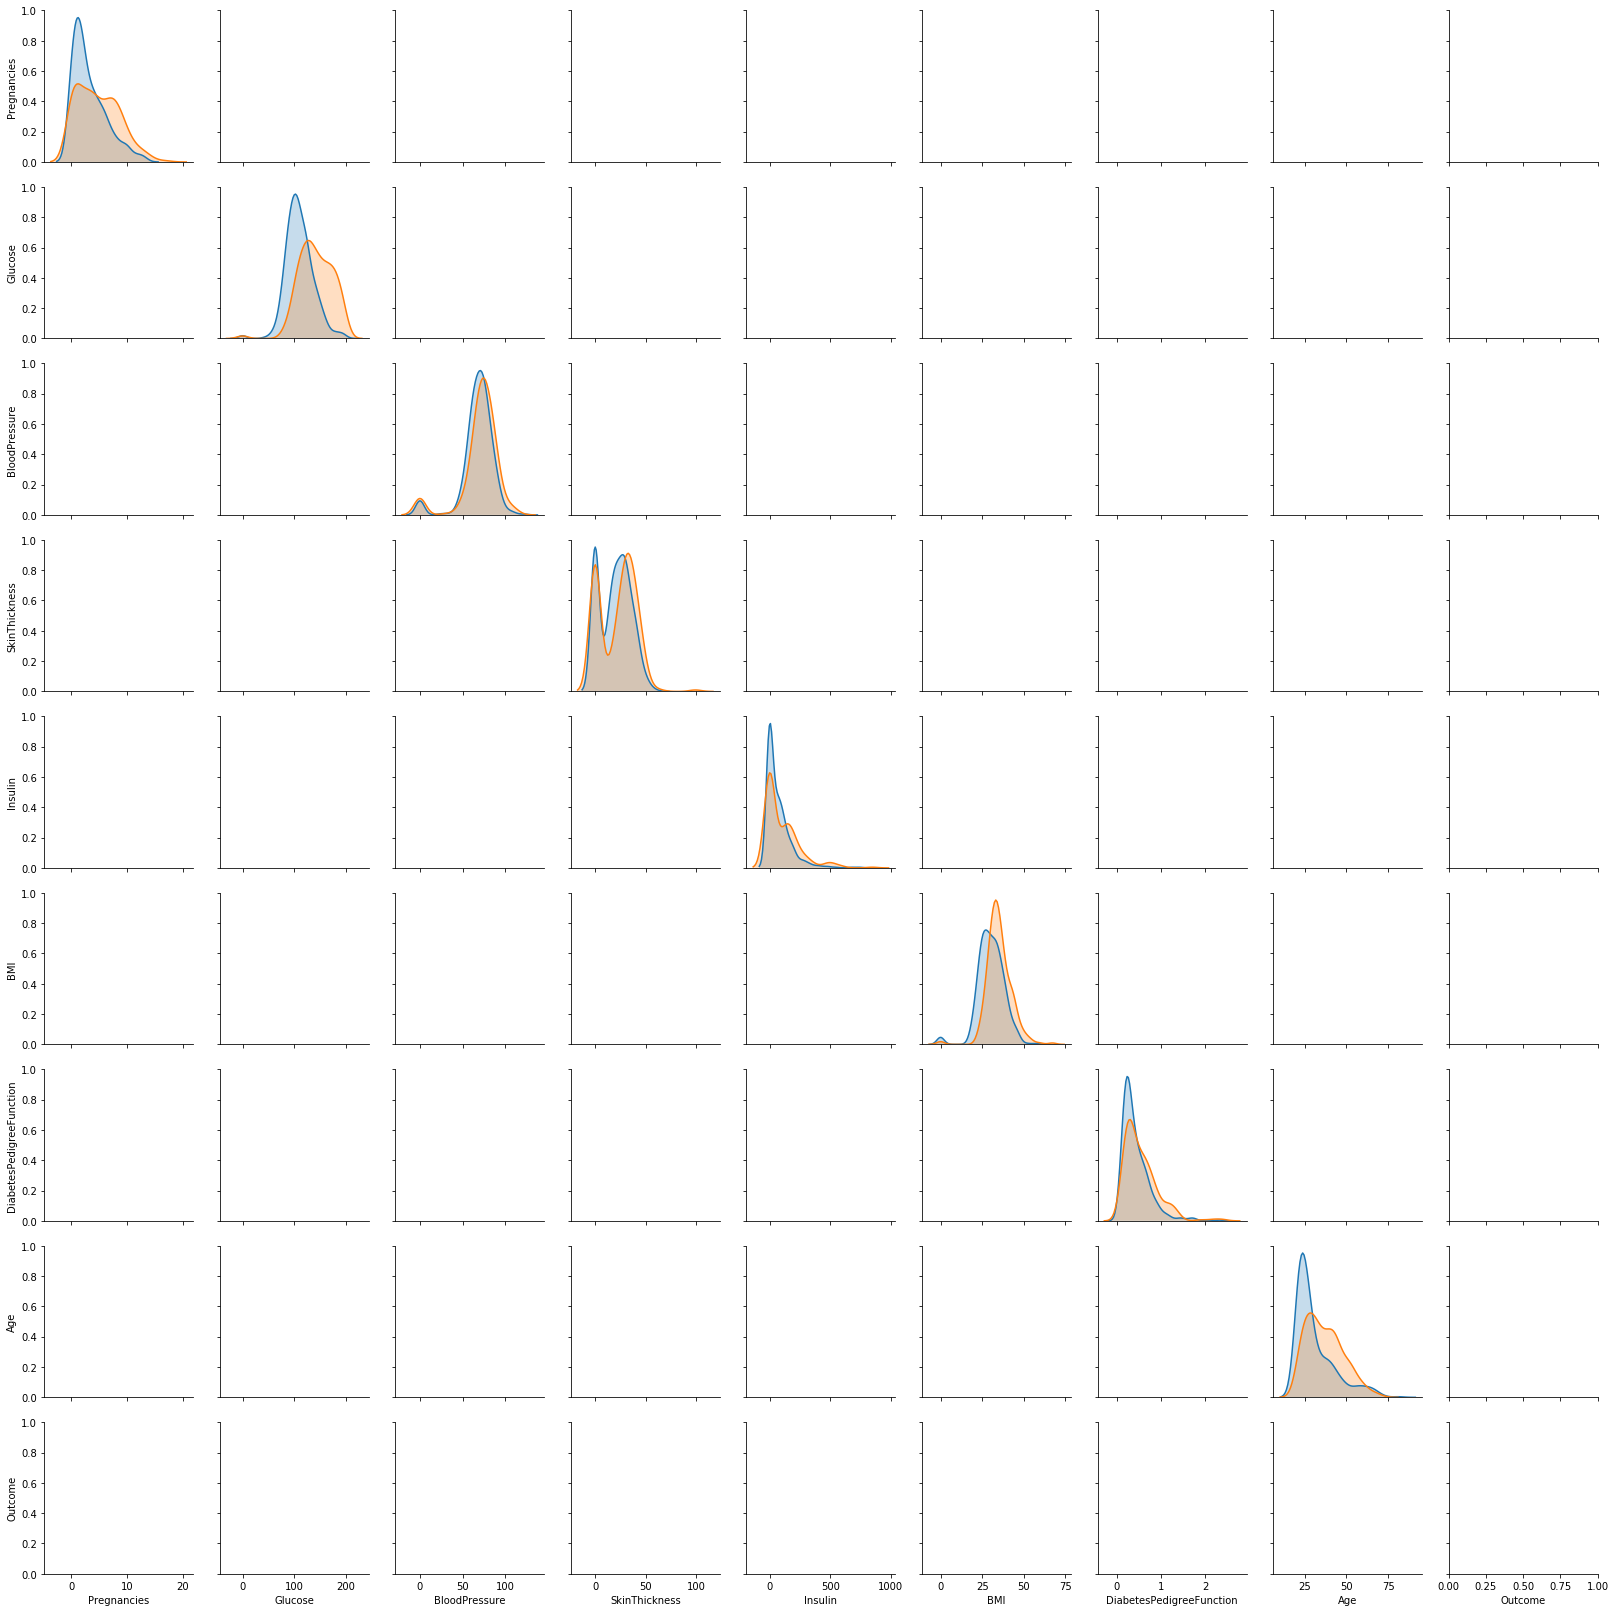

In [8]:


sns.pairplot(data=matrix,hue='Outcome')
plt.show()



In [4]:
print(matrix.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
matrix['Outcome']

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
schema = matrix.groupby('Outcome')
print (schema.size())

Outcome
0    500
1    268
dtype: int64


In [8]:
import seaborn as sns

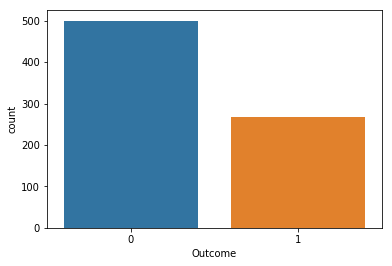

In [9]:
sns.countplot(matrix['Outcome'],label="Count")

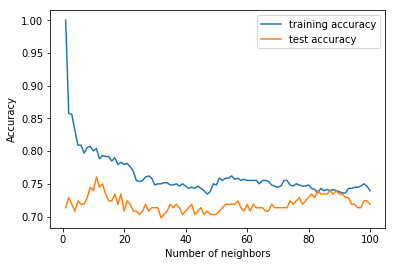

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(matrix.loc[:, matrix.columns != 'Outcome'], matrix['Outcome'], 
                                                    stratify=matrix['Outcome'], random_state=56)

from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 100
neighbors_settings = range(1, 101)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.savefig('knn_compare_model')



In [11]:
# corr=X_train.corr()
# top_corr=X_train[corr.nlargest(40,'Outcome')['Outcome'].index].corr()
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(20,15)
# sns.heatmap(top_corr, annot=True, ax=ax1)

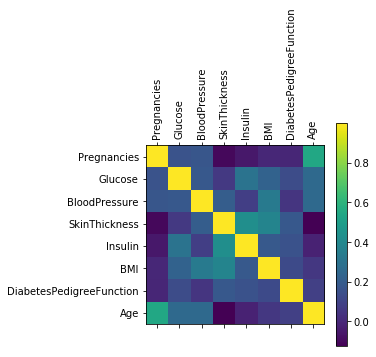

In [12]:
plt.matshow(X_train.corr())
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation = 'vertical')
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.colorbar()
plt.show()


In [13]:
# after knn best parameter is around 9 and 21
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print ("Train score with knn = 9 -> {}\nTest score with knn = 9 -> {}".format(knn.score(X_train, y_train), 
                                                                               knn.score(X_test, y_test)))

Train score with knn = 9 -> 0.8072916666666666
Test score with knn = 9 -> 0.7447916666666666


In [28]:
# with 20
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
print ("Train score with knn = 21 -> {}\nTest score with knn = 21 -> {}".format(knn.score(X_train, y_train), 
                                                                               knn.score(X_test, y_test)))

Train score with knn = 20 -> 0.78125
Test score with knn = 20 -> 0.7239583333333334


In [32]:
# now we will test with logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set with 100 parameter: {}".format(logreg.score(X_train, y_train)))
print("Test set with 100 parameter: {}".format(logreg.score(X_test, y_test)))

Training set score: 0.7881944444444444
Test set score: 0.7239583333333334


In [33]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set with 100 parameter: {}".format(logreg001.score(X_train, y_train)))
print("Test set with 100 parameter: {}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.708
Test set accuracy: 0.667


In [34]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set with 100 parameter: {}".format(logreg100.score(X_train, y_train)))
print("Test set with 100 parameter: {}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.7864583333333334
Test set accuracy: 0.7447916666666666


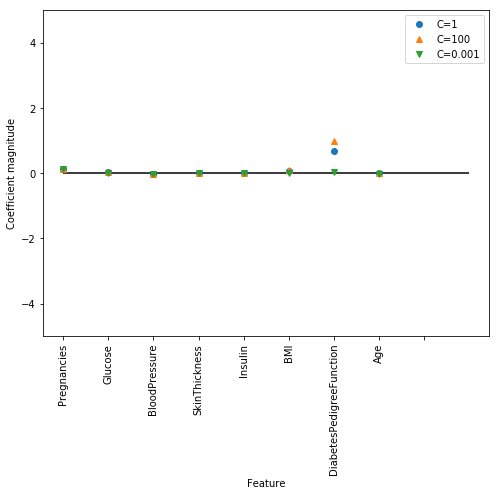

In [36]:
diabetes_features = [x for i,x in enumerate(matrix.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(matrix.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, matrix.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("training set: {}".format(tree.score(X_train, y_train)))
print("test set: {}".format(tree.score(X_test, y_test)))

training set: 1.0
test set: 0.671875


In [38]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("training set: {}".format(tree.score(X_train, y_train)))
print("test set: {}".format(tree.score(X_test, y_test)))

training set: 0.7777777777777778
test set: 0.7447916666666666


In [39]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.02886048 0.66068969 0.         0.         0.         0.17658328
 0.         0.13386655]


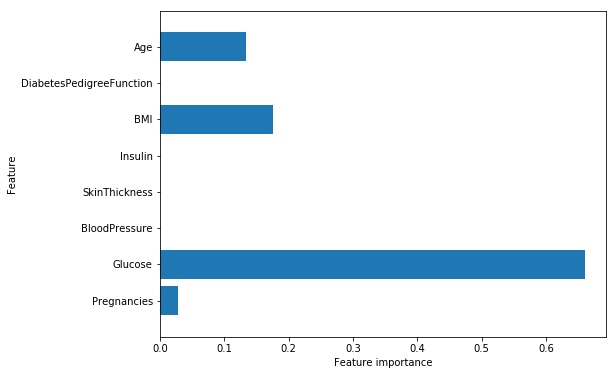

In [40]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("training set: {}".format(mlp.score(X_train, y_train)))
print("test set: {}".format(mlp.score(X_test, y_test)))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set: {}".format(
    mlp.score(X_train_scaled, y_train)))
print("test set: {}".format(mlp.score(X_test_scaled, y_test)))

training set: 0.7534722222222222
test set: 0.6354166666666666
training set: 0.8472222222222222
test set: 0.703125


In [47]:
# change few parameters
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set: {}".format(
    mlp.score(X_train_scaled, y_train)))
print("test set: {}".format(mlp.score(X_test_scaled, y_test)))

training set: 0.8350694444444444
test set: 0.7239583333333334


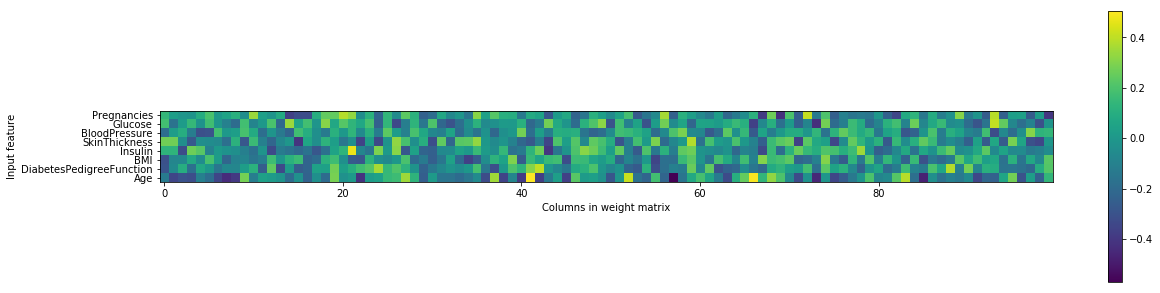

In [45]:
# first layer of network
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()